In [15]:
warnings.simplefilter('ignore')

In [3]:
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

covtype = fetch_covtype(shuffle=True, random_state=0)
X_covtype = covtype.data
y_covtype = covtype.target - 1
classes = np.unique(y_covtype)
X_train, X_test, y_train, y_test = train_test_split(X_covtype, y_covtype)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def read_Xy(start, end):
    # 이 데이터를 메모리에 한 번에 올릴 수 없다고 가정하고, 
    # 일부데이터만 로드하는 함수를 만듬.
    # 실무에서는 파일이나 데이터베이스에서 읽어옴
    idx = list(range(start, min(len(y_train)-1, end)))
    X = X_train[idx, :]
    y = y_train[idx]
    return X, y

In [4]:
X_train.shape

(435759, 54)

# SGD

In [7]:
from sklearn.linear_model import SGDClassifier

model = SGDClassifier().fit(X_train, y_train)

In [10]:
from sklearn.metrics import classification_report
y_train_pred   = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70    159017
           1       0.75      0.78      0.76    212572
           2       0.61      0.88      0.72     26685
           3       0.60      0.16      0.25      2033
           4       0.43      0.00      0.00      7110
           5       0.26      0.03      0.06     12953
           6       0.66      0.44      0.53     15389

    accuracy                           0.71    435759
   macro avg       0.57      0.43      0.43    435759
weighted avg       0.69      0.71      0.69    435759



In [11]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70     52823
           1       0.74      0.77      0.76     70729
           2       0.60      0.88      0.72      9069
           3       0.63      0.15      0.24       714
           4       0.43      0.00      0.00      2383
           5       0.22      0.03      0.05      4414
           6       0.67      0.46      0.54      5121

    accuracy                           0.71    145253
   macro avg       0.57      0.43      0.43    145253
weighted avg       0.69      0.71      0.69    145253



 전체 데이터를 한 번에 사용할 경우 accuracy는 모두 0.71이 나옴.

C:\Users\Hobin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Hobin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49845 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Hobin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Hobin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45733 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Hobin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44160 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Hobin\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51613 missing from c

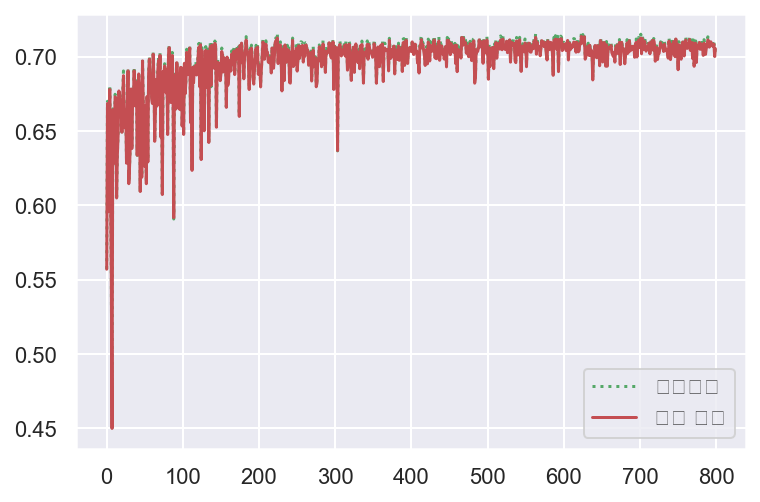

In [13]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

model =SGDClassifier(warm_start=True)

# 데이터를 400개의 조각으로 나누어 읽는다.
n_split = 400
n_X = len(y_train) // n_split
n_epoch = 2
accuracy_train = []
accuracy_test = []
for epoch in range(n_epoch):
    for n in range(n_split):
        X,y = read_Xy(n*n_X, (n+1)*n_X)
        model.partial_fit(X,y,classes=classes)
        accuracy_train.append(accuracy_score(y_train, model.predict(X_train)))
        accuracy_test.append(accuracy_score(y_test, model.predict(X_test)))

plt.plot(accuracy_train, 'g:', label='학습성능')
plt.plot(accuracy_test, 'r-', label='검증 성능')
plt.legend()
plt.show()

# 나이브베이즈 모형

- 대표 수종 데이터 중 X11부터는 0과 1로 이루어진 데이터
     - 베르누이 나이브 베이즈 사용 가능

In [16]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB().fit(X_train[:,10:], y_train)

In [17]:
y_train_pred = model.predict(X_train[:,10:])
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.66      0.46      0.54    159017
           1       0.65      0.78      0.71    212572
           2       0.60      0.87      0.71     26685
           3       0.45      0.59      0.51      2033
           4       0.23      0.06      0.10      7110
           5       0.23      0.20      0.22     12953
           6       0.62      0.58      0.60     15389

    accuracy                           0.63    435759
   macro avg       0.49      0.51      0.48    435759
weighted avg       0.63      0.63      0.62    435759



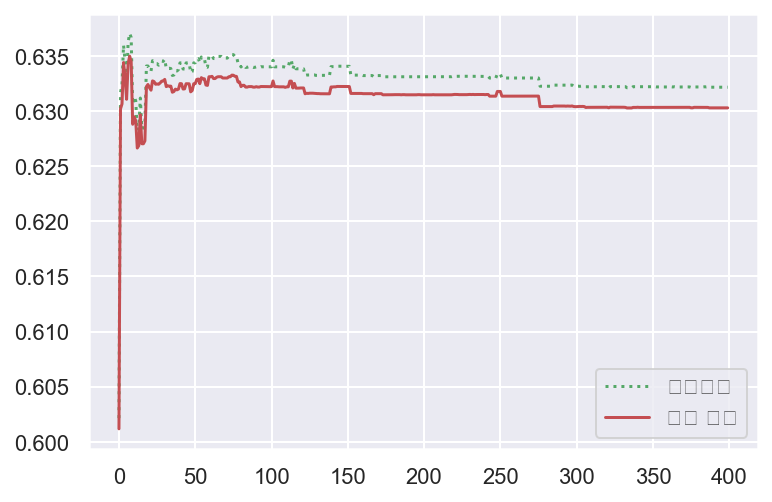

Wall time: 4min 33s


In [21]:
%%time

from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

model = BernoulliNB(alpha=0.1)

n_split = 400
n_X = len(y_train) // n_split

accuracy_train = []
accuracy_test = []

for n in range(n_split):
    X, y = read_Xy(n * n_X, (n + 1) * n_X)
    model.partial_fit(X, y, classes=classes)
    accuracy_train.append(accuracy_score(y_train, model.predict(X_train)))
    accuracy_test.append(accuracy_score(y_test, model.predict(X_test)))
    

plt.plot(accuracy_train, 'g:', label='학습성능')
plt.plot(accuracy_test, 'r-', label='검증 성능')
plt.legend()
plt.show()

# Random Forest

Wall time: 2min 27s


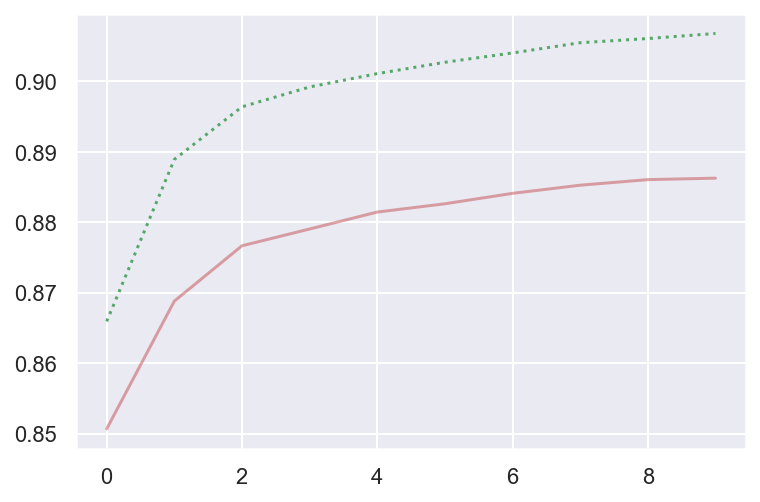

In [22]:
%%time

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

n_split = 10
n_X = len(y_train) // n_split
num_tree_ini = 10
num_tree_step = 10

model = RandomForestClassifier(n_estimators=num_tree_ini, warm_start=True)

accuracy_train = []
accuracy_test = []
for n in range(n_split):
    X, y = read_Xy(n * n_X, (n + 1) * n_X)
    model.fit(X, y)
    accuracy_train.append(accuracy_score(y_train, model.predict(X_train)))
    accuracy_test.append(accuracy_score(y_test, model.predict(X_test)))
    
    model.n_estimators += num_tree_step

plt.plot(accuracy_train, 'g:', label='학습 성능')
plt.plot(accuracy_test, 'r-',alpha=0.5, label='학습 성능')

# warm_start에 대해

## intro

- 일반적인 머신러닝 모델 구축은 그냥 fit - predict가 다죠. 네, 데이터를 전달하고 학습시키고, 예측합니다. 그리고 sklearn의 대부분의 모델들의 메소드도 이렇게 정리되어 있구요.
- 다만, 저처럼 컴퓨터의 메모리가 형편없다거나, 하는 경우에는 데이터를 나누어서 학습하는 것이 필요합니다. 한번에 다 넘기면 컴퓨터가 뭔가 느려터지게 되거든요. 따라서, 필요에 따라서 데이터를 나누어 학습하는 것이 필요하다는 이야기죠.네, 텐서플로우를 공부해보신 분은 빠르게 이해하실 텐데, mini-batch로 학습하는 것을 말합니다.

In [203]:
from sklearn.linear_model import SGDRegressor
np.random.seed(0)

X = np.linspace(-1, 1, 50).reshape(-1, 1)
y = (X*3.3 + 5.6).reshape(50,)

# Define Model
sgd_reg_model = SGDRegressor(
random_state=0,
verbose = 0,
max_iter =10)

In [25]:
print("first fitting")
sgd_reg_model.fit(X,y)
print('Coefficient: {}'.format(sgd_reg_model.coef_))

print("second fitting")
sgd_reg_model.fit(X,y)
print('Coefficient: {}'.format(sgd_reg_model.coef_))

first fitting
Coefficient: [1.26229792]
second fitting
Coefficient: [1.26229792]


In [28]:
# Define Model (with warm_start)
sgd_reg_model = SGDRegressor(
random_state=0,
verbose = 0,
max_iter =10,
warm_start=True)

print("first fitting")
sgd_reg_model.fit(X,y)
print('Coefficient: {}'.format(sgd_reg_model.coef_))

print("second fitting")
sgd_reg_model.fit(X,y)
print('Coefficient: {}'.format(sgd_reg_model.coef_))

first fitting
Coefficient: [1.26229792]
second fitting
Coefficient: [2.04389939]


In [128]:
# Define Model (with warm_start)
sgd_reg_model = SGDRegressor(
random_state=0,
verbose = 0,
max_iter =10,
warm_start=True)

print("first fitting")
sgd_reg_model.partial_fit(X,y)
print('Coefficient: {}'.format(sgd_reg_model.coef_))

print("second fitting")
sgd_reg_model.partial_fit(X,y)
print('Coefficient: {}'.format(sgd_reg_model.coef_))

first fitting
Coefficient: [0.24997091]
second fitting
Coefficient: [0.42395764]
